In [9]:
import pandas as pd
import math
from google.cloud import storage


In [10]:
client = storage.Client(project="uk-election-406413")
bucket = client.bucket("ukelectiondata")
files = bucket.list_blobs()
file_names = [file.name for file in files]


In [11]:
election_results = bucket.blob("full_df.csv")
election_results.download_to_filename('C:\\Users\\wg4618\\Documents\\LeWagon\\full_data.csv')


In [63]:
data = pd.read_csv('C:\\Users\\wg4618\\Documents\\LeWagon\\full_data.csv')
data.head(1)


,Unnamed: 0,Constituency,ONSConstID,year,Home_owners,Private_renters,Social_renters,0-9,10-19,20-29,...,labour_vote_share,liberal_democrats_votes,liberal_democrats_vote_share,main_parties_votes,main_parties_vote_share,other_parties_votes,other_parties_vote_share,winning_party,incumbent_party,winning_party_changed
0,1,Aberavon,W07000049,2010,0.644274,0.151463,0.204263,0.1096,0.1164,0.1227,...,0.519187,5034,0.162607,25518,0.824278,5440,0.175722,labour,labour,False


In [64]:
#data.columns[0]
data.drop(data.columns[0], axis=1, inplace=True)
data.columns
data.dropna(subset=['incumbent_party'], inplace=True)

X = data[['Home_owners', 'Private_renters','Social_renters',
          '0-9', '10-19', '20-29', '30-39', '40-49', '50-59',
          '60-69', '70-79', '80+',
          'Asian', 'Black', 'Mixed', 'Other', 'White',
          'Conservative_average', 'Conservative_max', 'Conservative_min', 'Conservative_Pre_GE_poll',
          'Labour_average', 'Labour_max', 'Labour_min', 'Labour_Pre_GE_poll',
          'LD_average', 'LD_max', 'LD_min', 'LD_Pre_GE_poll', 'incumbent_party']]

y= data[['conservative_votes', 'labour_votes', 'liberal_democrats_votes', 'other_parties_votes']]


In [65]:
X.head(1)


,Home_owners,Private_renters,Social_renters,0-9,10-19,20-29,30-39,40-49,50-59,60-69,...,Conservative_Pre_GE_poll,Labour_average,Labour_max,Labour_min,Labour_Pre_GE_poll,LD_average,LD_max,LD_min,LD_Pre_GE_poll,incumbent_party
0,0.644274,0.151463,0.204263,0.1096,0.1164,0.1227,0.1266,0.138,0.1357,0.1187,...,0.35,0.323492,0.408,0.232,0.281,0.183279,0.26,0.133,0.26,labour


In [66]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

#encoded_data = encoder.fit_transform(X[['incumbent_party']])

X[encoder.get_feature_names_out()] = encoder.fit_transform(X[['incumbent_party']])
X.drop(columns=["incumbent_party", "incumbent_party_other_parties"], inplace=True)
X.head(2)


/home/willgreen93/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_28453/1883177761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[encoder.get_feature_names_out()] = encoder.fit_transform(X[['incumbent_party']])
/tmp/ipykernel_28453/1883177761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

,Home_owners,Private_renters,Social_renters,0-9,10-19,20-29,30-39,40-49,50-59,60-69,...,Labour_max,Labour_min,Labour_Pre_GE_poll,LD_average,LD_max,LD_min,LD_Pre_GE_poll,incumbent_party_conservative,incumbent_party_labour,incumbent_party_liberal_democrats
0,0.644274,0.151463,0.204263,0.1096,0.1164,0.1227,0.1266,0.1380,0.1357,0.1187,...,0.408,0.232,0.281,0.183279,0.26,0.133,0.260,0.0,1.0,0.0
1,0.659775,0.136265,0.203960,0.1128,0.1095,0.1232,0.1293,0.1289,0.1422,0.1209,...,0.428,0.281,0.336,0.103623,0.27,0.074,0.083,0.0,1.0,0.0


In [67]:
y.head(2)


,conservative_votes,labour_votes,liberal_democrats_votes,other_parties_votes
0,4411,16073,5034,5440
1,3742,15416,1397,10968


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Coefficients: [[-1.68021760e+17 -1.68021760e+17 -1.68021760e+17  2.05526824e+05
   2.29013895e+05  2.10612088e+05  2.44264364e+05  2.84677456e+05
   2.12738390e+05  1.42153319e+05  3.44083135e+05  2.16745530e+05
   6.24622235e+10  6.24622171e+10  6.24623008e+10  6.24621978e+10
   6.24622240e+10  4.37242305e+15 -1.61832639e+16 -8.22558869e+15
  -1.90149473e+16  7.90354276e+15 -1.59038999e+16 -5.05077956e+15
  -2.68651337e+15  4.25950822e+15 -1.38208287e+16  2.12510508e+15
   2.43732783e+14  1.73120000e+04  6.81600000e+03  9.52243750e+03]
 [ 8.16989043e+16  8.16989043e+16  8.16989043e+16  4.49950366e+04
   8.17044451e+04  1.14187481e+05  1.33342662e+05  8.54465314e+04
   1.14185209e+05  1.88113020e+05 -8.91326020e+03  1.04401012e+04
   2.12427020e+11  2.12427036e+11  2.12426964e+11  2.12426995e+11
   2.12427007e+11 -2.12604708e+15  7.86895063e+15  3.99961043e+15
   9.24582843e+15 -3.84301881e+15  7.73311266e+15  2.45589117e+15
   1.30629032e+15 -2.07114337e+15  6.72024008e+15 -1.03331114

In [ ]:
y_pred


<AxesSubplot:ylabel='conservative_votes'>

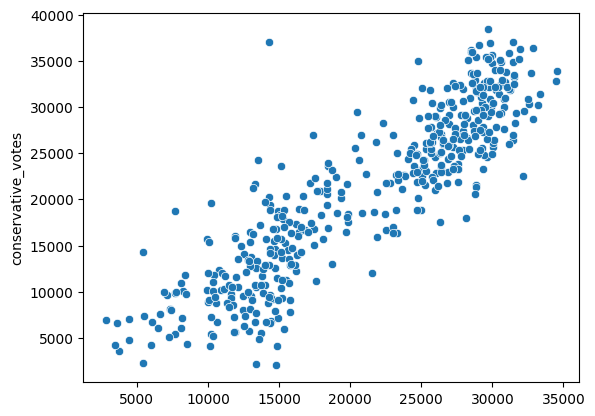

In [82]:
import seaborn as sns
sns.scatterplot(x=y_pred[:,0], y=y_test['labour_votes'])
